In [29]:
import pickle
from pathlib import Path

import numpy as np

In [30]:
log_dir = r"G:\projects\gfos\logs\pipeline\xla_ensemble\multiruns\2023-10-22_15-23-15"

In [31]:
output_files = list(Path(log_dir).glob("*/wandb/*/files/*.plk"))

In [32]:
logits = [pickle.load(open(f, "rb")) for f in output_files]

In [33]:
results = {}

for logit in logits:
    for key, value in logit.items():
        if key not in results:
            results[key] = []
        results[key].append((value - value.min()) / (value.max() - value.min()))

In [35]:
blend_results = {}

for key, value in results.items():
    r = np.stack(value, axis=0)
    blend_results[key] = np.argsort(np.mean(value, axis=0))

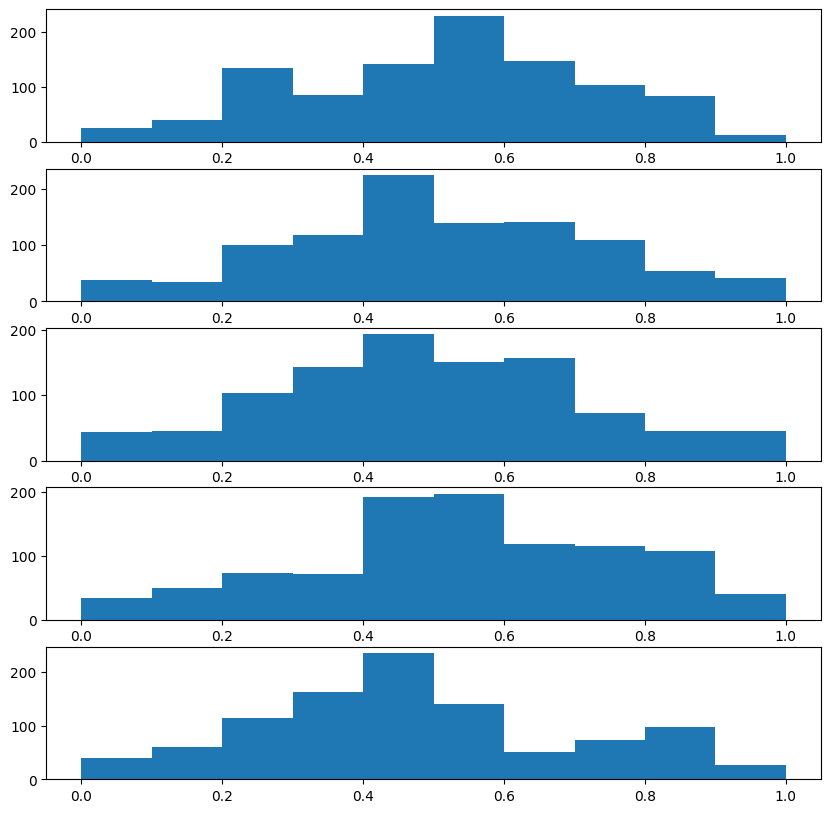

In [34]:
import matplotlib.pyplot as plt


rs = results["05ae41e26dd3c4c06390371a0423233c"]
axes = plt.subplots(5, 1, figsize=(10, 10))[1].flatten()
for i, ax in enumerate(axes):
    ax.hist(rs[i])


In [36]:
SOURCE = "xla"
SEARCH = "random"


with open(f"../../output/{SOURCE}_{SEARCH}_blend_5_folds.csv", "w") as f:
    f.write("ID,TopConfigs\n")
    for k, v in blend_results.items():
        model_id = f"layout:{SOURCE}:{SEARCH}:"+k
        values = ";".join([str(i) for i in v])
        f.write(f"{model_id},{values}\n")
